In [5]:
import numpy as np 
import pandas as pd
from pprint import pprint
product = pd.read_csv('C:/instacart/products.csv')
product.head()
documents2=product['product_name'].apply(lambda x:x.split(' ')).tolist()
documents=documents2[0:200]
print(documents)

[['Chocolate', 'Sandwich', 'Cookies'], ['All-Seasons', 'Salt'], ['Robust', 'Golden', 'Unsweetened', 'Oolong', 'Tea'], ['Smart', 'Ones', 'Classic', 'Favorites', 'Mini', 'Rigatoni', 'With', 'Vodka', 'Cream', 'Sauce'], ['Green', 'Chile', 'Anytime', 'Sauce'], ['Dry', 'Nose', 'Oil'], ['Pure', 'Coconut', 'Water', 'With', 'Orange'], ['Cut', 'Russet', 'Potatoes', 'Steam', "N'", 'Mash'], ['Light', 'Strawberry', 'Blueberry', 'Yogurt'], ['Sparkling', 'Orange', 'Juice', '&', 'Prickly', 'Pear', 'Beverage'], ['Peach', 'Mango', 'Juice'], ['Chocolate', 'Fudge', 'Layer', 'Cake'], ['Saline', 'Nasal', 'Mist'], ['Fresh', 'Scent', 'Dishwasher', 'Cleaner'], ['Overnight', 'Diapers', 'Size', '6'], ['Mint', 'Chocolate', 'Flavored', 'Syrup'], ['Rendered', 'Duck', 'Fat'], ['Pizza', 'for', 'One', 'Suprema', '', 'Frozen', 'Pizza'], ['Gluten', 'Free', 'Quinoa', 'Three', 'Cheese', '&', 'Mushroom', 'Blend'], ['Pomegranate', 'Cranberry', '&', 'Aloe', 'Vera', 'Enrich', 'Drink'], ['Small', '&', 'Medium', 'Dental', 'Dog'

In [6]:
from __future__ import division 
import math, random, re 
from collections import defaultdict, Counter 
from bs4 import BeautifulSoup 
import requests 

def sample_from(weights): 
     total = sum(weights) 
     rnd = total * random.random()       # uniform between 0 and total 
     for i, w in enumerate(weights): 
         rnd -= w                        # return the smallest i such that 
         if rnd <= 0: return i           # sum(weights[:(i+1)]) >= rnd 
 

In [7]:

K = 4 

 
document_topic_counts = [Counter() for _ in documents] 
topic_word_counts = [Counter() for _ in range(K)] 

topic_counts = [0 for _ in range(K)] 

document_lengths = [len(d) for d in documents]
  
distinct_words = set(word for document in documents for word in document) 
W = len(distinct_words) 
D = len(documents) 

def p_topic_given_document(topic, d, alpha=0.1): 
    """the fraction of words in document _d_ 
     that are assigned to _topic_ (plus some smoothing)""" 

 
    return ((document_topic_counts[d][topic] + alpha) / 
            (document_lengths[d] + K * alpha)) 

 
def p_word_given_topic(word, topic, beta=0.1): 
    """the fraction of words assigned to _topic_ 
    that equal _word_ (plus some smoothing)""" 
 
    return ((topic_word_counts[topic][word] + beta) / 
           (topic_counts[topic] + W * beta)) 

 
def topic_weight(d, word, k): 
    """given a document and a word in that document, 
    return the weight for the k-th topic""" 

 
    return p_word_given_topic(word, k) * p_topic_given_document(k, d) 

 
def choose_new_topic(d, word): 
    return sample_from([topic_weight(d, word, k) 
                        for k in range(K)]) 

In [8]:
random.seed(0) 
document_topics = [[random.randrange(K) for word in document] 
                   for document in documents] 
#print(document_topic_counts)
#print(topic_word_counts)
#print(document_lengths)
#print(distinct_words)

In [9]:
for d in range(D): 
    for word, topic in zip(documents[d], document_topics[d]): 
        document_topic_counts[d][topic] += 1 
        topic_word_counts[topic][word] += 1 
        topic_counts[topic] += 1 
 
 
for iter in range(1000): 
    for d in range(D): 
        for i, (word, topic) in enumerate(zip(documents[d], 
                                              document_topics[d])): 
 
 
            # remove this word / topic from the counts 
           # so that it doesn't influence the weights 
            document_topic_counts[d][topic] -= 1 
            topic_word_counts[topic][word] -= 1 
            topic_counts[topic] -= 1 
            document_lengths[d] -= 1 
 
           # choose a new topic based on the weights 
            new_topic = choose_new_topic(d, word) 
            document_topics[d][i] = new_topic 

 
           # and now add it back to the counts 
            document_topic_counts[d][new_topic] += 1 
            topic_word_counts[new_topic][word] += 1 
            topic_counts[new_topic] += 1 
            document_lengths[d] += 1

#print(topic_word_counts)


In [10]:
k_list=[]
word_list=[]
count_list=[]
for k, word_counts in enumerate(topic_word_counts): 
         for word, count in word_counts.most_common(): 
             if count > 0: k_list.append(k) ;count_list.append(count); word_list.append(word);print (k, word, count)
                    


0 & 8
0 Butter 8
0 Juice 5
0 Strawberry 5
0 Fruit 5
0 Whole 5
0 Sparkling 4
0 Bread 4
0 Natural 4
0 Cookies 3
0 Water 3
0 Orange 3
0 Chocolate 3
0 Pomegranate 3
0 Wheat 3
0 Cereal 3
0 Blueberry 3
0 All 3
0 Sandwich 3
0 Peanut 3
0 Yogurt 3
0 Sweet 3
0 With 2
0 Light 2
0 Free 2
0 Supplement 2
0 Apples 2
0 Coconut 2
0 100% 2
0 Pita 2
0 Living 2
0 Wild 2
0 Pure 2
0 Gluten 2
0 Spring 2
0 Cookie 2
0 Crackers 2
0 Energy 2
0 Aloe 2
0 Feast 2
0 Antibacterial 2
0 Chip 2
0 Grain 2
0 Lamb 2
0 Tri-Vi-Sol® 1
0 Vitamins 1
0 Infants 1
0 Bar 1
0 Flaked 1
0 Cat 1
0 Food 1
0 Raspberry 1
0 4 1
0 Lemon 1
0 Popcorn 1
0 Bites 1
0 Go-Pak 1
0 Apple 1
0 Soppressata 1
0 Sliced 1
0 Mashups 1
0 Jam 1
0 Bread, 1
0 Danish 1
0 Tomato 1
0 Marscapone 1
0 Dip 1
0 Adult 1
0 Vitamins, 1
0 Cherry 1
0 Blush 1
0 T 1
0 Bone 1
0 Chops 1
0 Prickly 1
0 Pear 1
0 D 1
0 Sausages 1
0 Teething 1
0 Honeycrisp 1
0 Nutter 1
0 Infant's 1
0 Suisse 1
0 Steak 1
0 Sardines 1
0 Simmer 1
0 Kiwi 1
0 Trout 1
0 Seltzer 1
0 - 1
0 CT 1
0 Muffins 1


In [11]:

print(k_list)
print(word_list)
print(count_list)
print(k_list.count(0))
print(k_list.count(1))
print(k_list.count(2))
print(k_list.count(3))




[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

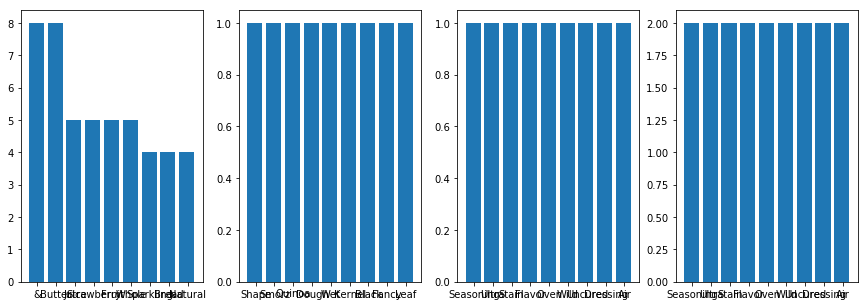

In [12]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,5))
w1=word_list[0:9]
c1=count_list[0:9]
w2=word_list[103:112]
c2=count_list[103:112]
w3=word_list[218:227]
c3=count_list[218:227]
w4=word_list[323:332]
c4=count_list[323:332]

xs = [i + 0.1 for i, _ in enumerate(w1)]
plt.subplot(141)
plt.bar(xs,c1)
plt.xticks([i + 0.15 for i , _ in enumerate(w1)], w1)
plt.subplot(142)
plt.bar(xs,c2)
plt.xticks([i + 0.15 for i , _ in enumerate(w2)], w2)
plt.subplot(143)
plt.bar(xs,c3)
plt.xticks([i + 0.15 for i , _ in enumerate(w3)], w4)
plt.subplot(144)
plt.bar(xs,c4)
plt.xticks([i + 0.15 for i , _ in enumerate(w4)], w4)
plt.show()

    

In [13]:
topic_names = ["topic1", 
                    "topic2", 
                    "topic3", 
                    "topic4"] 
 
 
for document, topic_counts in zip(documents, document_topic_counts): 
         print (document) 
         for topic, count in topic_counts.most_common(): 
             if count > 0: 
                 print (topic_names[topic], count) 
         print()   

['Chocolate', 'Sandwich', 'Cookies']
topic1 3

['All-Seasons', 'Salt']
topic4 1
topic2 1

['Robust', 'Golden', 'Unsweetened', 'Oolong', 'Tea']
topic4 5

['Smart', 'Ones', 'Classic', 'Favorites', 'Mini', 'Rigatoni', 'With', 'Vodka', 'Cream', 'Sauce']
topic2 10

['Green', 'Chile', 'Anytime', 'Sauce']
topic2 4

['Dry', 'Nose', 'Oil']
topic3 3

['Pure', 'Coconut', 'Water', 'With', 'Orange']
topic1 5

['Cut', 'Russet', 'Potatoes', 'Steam', "N'", 'Mash']
topic4 6

['Light', 'Strawberry', 'Blueberry', 'Yogurt']
topic1 4

['Sparkling', 'Orange', 'Juice', '&', 'Prickly', 'Pear', 'Beverage']
topic1 6
topic2 1

['Peach', 'Mango', 'Juice']
topic1 2
topic4 1

['Chocolate', 'Fudge', 'Layer', 'Cake']
topic3 3
topic4 1

['Saline', 'Nasal', 'Mist']
topic2 2
topic4 1

['Fresh', 'Scent', 'Dishwasher', 'Cleaner']
topic4 4

['Overnight', 'Diapers', 'Size', '6']
topic3 4

['Mint', 'Chocolate', 'Flavored', 'Syrup']
topic4 4

['Rendered', 'Duck', 'Fat']
topic3 3

['Pizza', 'for', 'One', 'Suprema', '', 'Frozen